## Required dependencies

This notebook requires that you have 
[`matplotlib`](https://pypi.org/project/matplotlib/) installed,
and, of course, [Lmo](https://pypi.org/project/lmo/) (preferrably the latest
stable release).

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
np.set_printoptions(precision=5, suppress=True)
plt.style.use([
    'dark_background',
    'seaborn-v0_8-notebook',
    '../styles/gallery.mplstyle',
])

## Dealing with data

Let's start with some data

In [3]:
data = np.array([
    0.87, 0.87, 1.29, 1.50, 1.70, 0.66, 1.50, 0.5, 1.00, 1.25, 2.30,
    1.03, 2.85, 0.68, 1.74, 1.94, 0.63, 2.04, 1.2, 0.64, 2.05, 0.97,
    2.81, 1.02, 2.76, 0.86, 1.36, 1.29, 1.68, 0.72, 1.67, 1.15, 3.26,
    0.93, 0.83, 0.91, 0.92, 2.32, 1.12, 3.21, 1.23, 1.22, 1.29, 2.08,
    0.64, 2.83, 2.68, 1.77, 0.69, 1.69, 0.70, 1.83, 2.25, 1.23, 1.17,
    0.94, 1.22, 0.76, 0.69, 0.48, 1.04, 2.49, 1.38, 1.57, 1.79, 1.59,
    1.30, 1.54, 1.07, 1.03, 0.76, 2.35, 2.05, 2.02, 2.36, 1.59, 0.97,
    1.63, 1.66, 0.94, 1.45, 1.26, 1.25, 0.68, 2.96, 0.80, 1.16, 0.82,
    0.64, 0.87, 1.33, 1.28, 1.26, 1.19, 1.24, 1.12, 1.45, 1.03, 1.37,
    1.40, 1.35, 1.28, 1.04, 1.31, 0.87, 0.96, 2.55, 1.72, 1.05, 1.15,
    1.73, 1.03, 1.53, 2.41, 1.36, 2.08, 0.92, 0.73, 1.56, 1.94, 0.78,
])

Let's see what the data looks like:

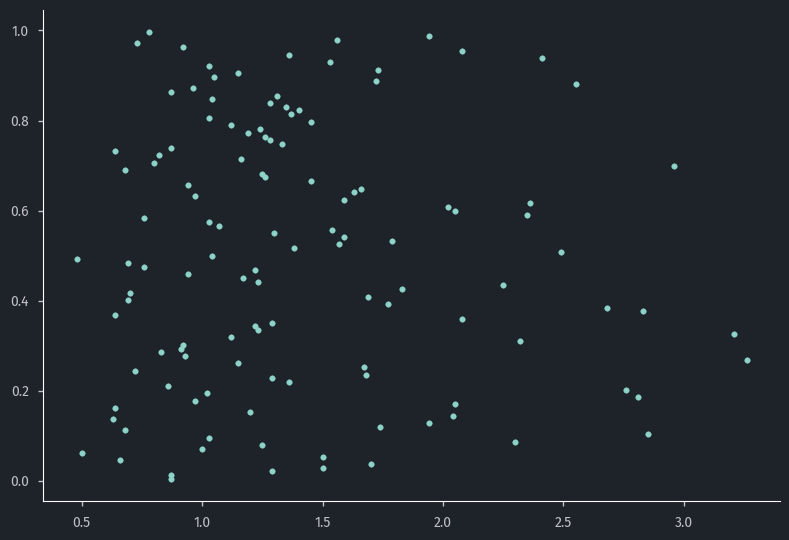

In [4]:
n_samp = len(data)
# instead of at 0th quantile, start at the "center" of the first sample
q0 = 1 / (2 * n_samp)
# quantiles, a.k.a. "plotting positions"
qs = np.linspace(q0, 1 - q0, len(data))
# plot the data against the quantiles
_ = plt.scatter(data, qs, s=16)

Oh, That's not very useful &#x1F605;

Let's do this again, but now we sort the data first:

[Text(0.5, 0, '$x_{k:n}$'), Text(0, 0.5, '$\\hat{F}(\\cdot)$')]

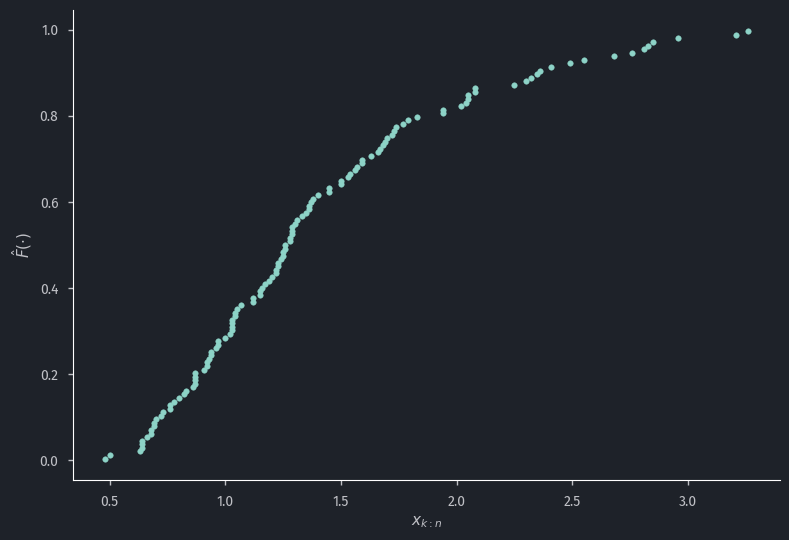

In [5]:
data_sorted = np.sort(data)
plt.scatter(data_sorted, qs, s=16)
plt.gca().update({'xlabel': r'$x_{k:n}$', 'ylabel': r'$\hat{F}(\cdot)$'})

That's a lot better!

It's almost as if we're looking at a cumulative distribution function &#x1F914;

## L-moments from scratch

Now it's (finally) time to look at some L-moments.

### The L-location $\lambda_1$

This is the first L-moment. 
As the name suggests, it describes the *location* of a distribution.

The analogue with *product-moments* is the first *raw moment*, although it
usually is called "the mean".

Let's compare the two:

In [6]:
import lmo

print(lmo.l_loc(data))
print(np.mean(data))

1.4087603305785124
1.4087603305785124


... no, that's not a coincidence:
The L-location is, in fact, equivalent to the mean &#x1F937;.

However! This is only the case for the first L-moment.
And later we'll see that this also isn't the case anymore if we *trim* it.

Anyway, it's time to move on to the cool stuff.

### The L-scale $\lambda_2$

The *L-scale* is a measure of dispersion, just like the *standard deviation*.
It's simply the 2nd L-moment, so there's no need to worry about square roots.

There's also no need to worry about that $ / (n - 1)$ stuff 
([Bessel's correction](https://wikipedia.org/wiki/Bessel%27s_correction))
that you need to get ~~an unbiased~~ a less biased estimate of the standard
deviation...

... and that's because, yes you guessed right, the L-scale is always unbiased!

Ok, now let's take a look at the L-scale and the standard deviation, so
we can see which one is better:

In [7]:
print(lmo.l_scale(data))
print(np.std(data))

0.34159366391184576
0.6217152629447046


Well, they clearly aren't the same thing this time...
But it doesn't tell us much, really.

And what even **is** the L-scale, anyway?
Ok, I'll try to pain a picture of it:

[Text(0.5, 0, '$k$'), Text(0, 0.5, '$w_{k:n}$')]

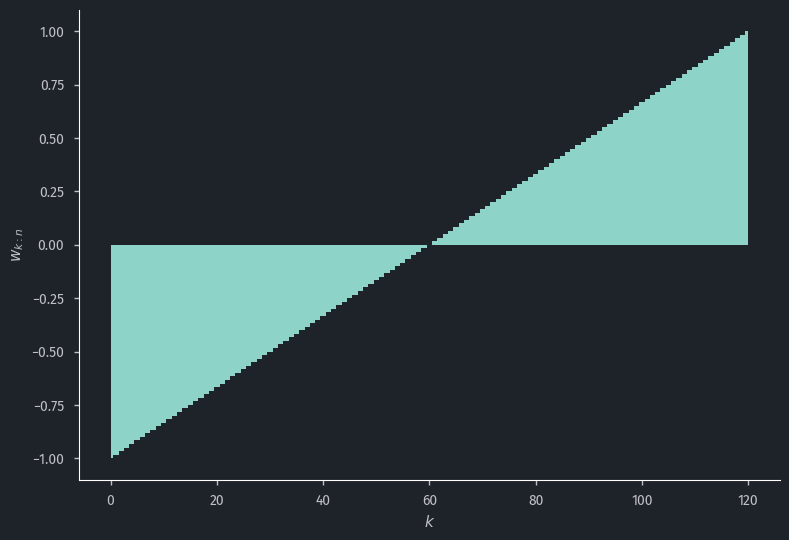

In [8]:
ks = np.arange(n_samp)
what_the_L_is_this = lmo.l_weights(2, n_samp)[-1] * n_samp
# plt.plot(ks, what_the_L_is_this)
plt.fill_between(ks, what_the_L_is_this, step='mid')
plt.gca().update({'xlabel': '$k$', 'ylabel':  r'$w_{k:n}$'})

Yes, this beautiful painting is, in fact, an area plot of a perfectly straight
*line*.

> ... wait wait, come back! It wasn't a joke! I'm actually going somewhere 
> with this! 

~ahem~ 

What we're looking at here, are the *linear weights* (on the y-axis) for each 
of the *ordered* samples (the x-axis).

If we multiply each of these weights with `data_sorted`, and then calculate 
the ~~L-location~~ ~~1st raw moment~~ mean, we end up with the L-scale!

This is what the "L" in the L-scale (and L-moment) stands for: *Linear*.

> Yes, yes, I hear you, please stop shouting!
> Of course, sorting isn't a linear operation, I agree with you..
> So how about we label it as "sorta" linear, and call it a day?
> ...
> No wait! put that down! I was only joking! It was just a puu...

So... Where was I?

Ah yes!! L-scale weights; let's try them out:


In [9]:
# L-scale for reference
print('Lmo L-scale:', lmo.l_scale(data))
# DIY L-scale; no duct-tape needed!
print('DIY L-scale:', np.mean(what_the_L_is_this * data_sorted))

Lmo L-scale: 0.34159366391184576
DIY L-scale: 0.34159366391184576


See? I actually *was* going somewhere!

For bonus points, let's add some "algebra" to that "linear", so that we 
can calculate *both* the L-location (yes, still the mean) *and* the L-scale
*simultaneously*:

In [10]:
# Lmo (that's right: multi-tasking is no problem for Lmo!):
print('Lmo:', lmo.l_moment(data, [1, 2]))

# DIY:
ah_so_these_are_actually_sample_weights = lmo.l_weights(2, n_samp)
diy_l_scale = ah_so_these_are_actually_sample_weights @ data_sorted
print('DIY:', diy_l_scale)


Lmo: [1.40876 0.34159]
DIY: [1.40876 0.34159]


~drops mic~

&nbsp;

<sub>... on toe</sub>

### The L-skewness $\tau_3$

Now this one is a bit of a twist: 

It's not an L-moment!

...

...

~ now it's your yurn to ask "... but what is it then???" ... ~

...

...

c'mon, I practiced all night for this, please play along...

...

...

~sigh~

...

...

ehrm, I'm glad you asked! It's an L-moment ratio!

...

~ silence ~

...

~ why am I doing this again? ~

...

Ok let's just finish this; It's an L-moment that's divided by the L-scale.
So these L-moment ratio's (or L-ratio's for short) are the analogue of 
*standardized moments. 

Without going into detail, just quickly glance over these following equations,
for the two, and see which one you like better:

| Fisher Skewness (from raw moments) | L-Skewness (from L-moments) |
| :-----------------------: | :---------------: |
| $ \displaystyle \tilde{\mu}_3 = \frac{\mu_3 - 3\mu_1 \mu_2 + 2\mu_1^3}{(\mu_2 - \mu_1^2)^{3/2}}$ | $\displaystyle \tau_3 = \frac{\lambda_3}{\lambda_2}$ |

So apart from complexity, the L-skewness is still linear, whereas the Fisher
Skewness requires a 3rd power.
In case your data contains some outliers, or its distribution is heavy-tailed,
then the Fisher skewness will quickly break down.
But the L-skewness is just as robust as the mean is, and will treat
outliers just like any other sample.

---

Anyway, enough talk, let's visualize it (i.e. its sample weights):

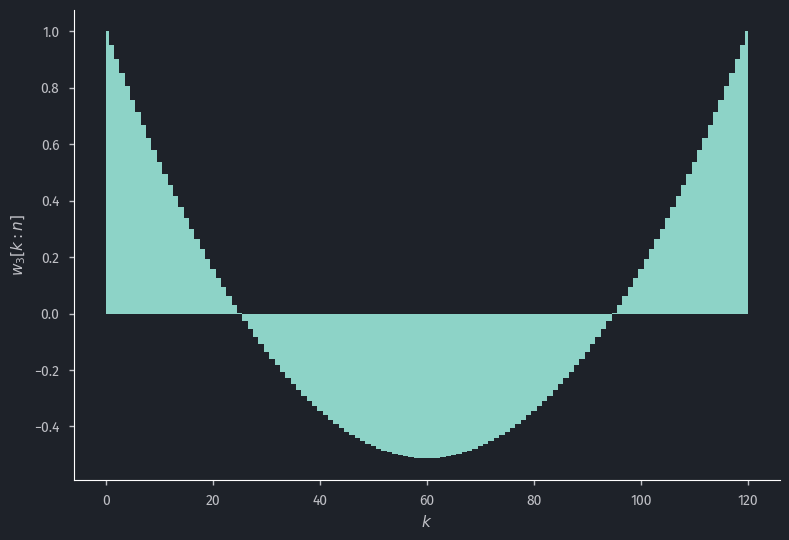

In [11]:
def plot_l_weights(rth: int, size: int, *, ax=plt):
    assert rth > 0
    w_r_k = lmo.l_weights(rth, size)
    ax.fill_between(np.arange(size), w_r_k[-1] * size, step='mid')
    try:
        ax.xlabel('$k$')
        ax.ylabel(f'$w_{rth}[k:n]$')
    except AttributeError:
        ax.set_xlabel('$k$')
        ax.set_ylabel(f'$w_{rth}[k:n]$')
    return w_r_k


l_weights_3 = plot_l_weights(3, n_samp)

Now that's more like it!

And now for let's actually calculate the L-skewness:

In [12]:
print('Lmo:', lmo.l_skew(data))
# the `l_weights` index is 1-based, so -1 is first applied here
print('DIY:', (l_weights_3[2] @ data_sorted) / (l_weights_3[1] @ data_sorted))

Lmo: 0.2189964482831403
DIY: 0.2189964482831402


Apart from the tiny (safe-to-ignore) numerical error, it's a match &#x1F389;!

### The L-kurtosis $\tau_4$

Well, I'm sure you know the drill by know. So here's the short version

- L-moments: **good**
- Product moments: **bad**
- Now, pics please!

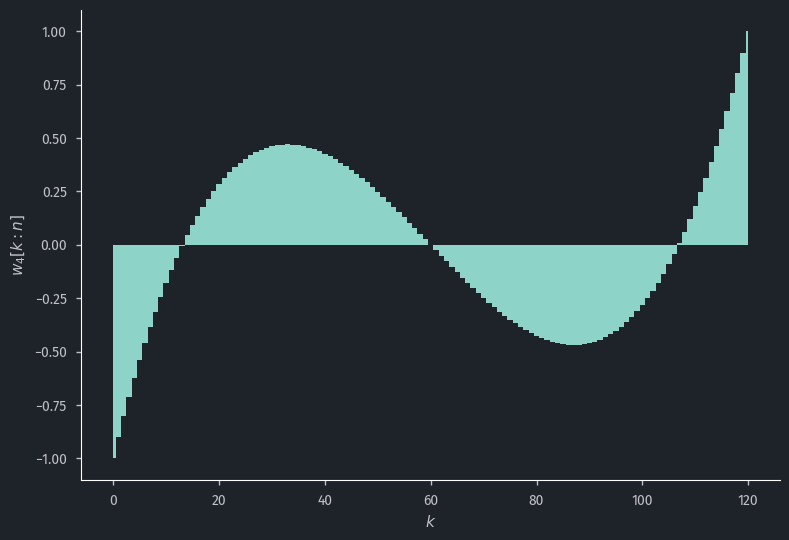

In [13]:
l_weights_4 = plot_l_weights(4, n_samp)

### L-"all of the above", a.k.a. the *L-stats*

Now for our final trick; let's calculate everything at once!

In [14]:
# c'est ça
print('Lmo:', lmo.l_stats(data))

diy_lmo_all4 = l_weights_4 @ data_sorted
diy_lmo_all4[2:] /= diy_lmo_all4[1]  # L-moment's => L-ratio's for r > 2
print('DIY:', diy_lmo_all4)

Lmo: [1.40876 0.34159 0.219   0.13282]
DIY: [1.40876 0.34159 0.219   0.13282]


While we're at it, let's also make an L-collage &#x1F37E;.

But this time, let's go for that full 16-bit experience &#x1F579;

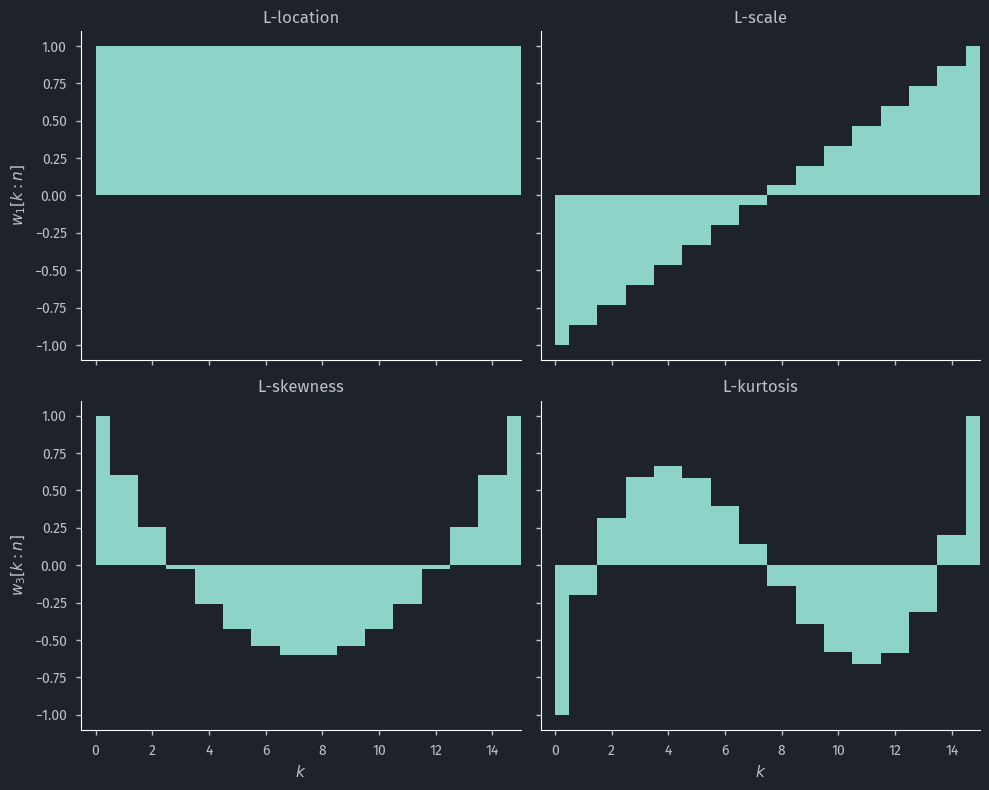

In [15]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8), sharey=True, sharex=True)

n_hindsight = 16

plot_l_weights(1, n_hindsight, ax=axs[0, 0])
axs[0, 0].set_title('L-location')
axs[0, 0].set_xlabel(None)

plot_l_weights(2, n_hindsight, ax=axs[0, 1])
axs[0, 1].set_title('L-scale')
axs[0, 1].set_xlabel(None)
axs[0, 1].set_ylabel(None)

plot_l_weights(3, n_hindsight, ax=axs[1, 0])
axs[1, 0].set_title('L-skewness')

plot_l_weights(4, n_hindsight, ax=axs[1, 1])
axs[1, 1].set_title('L-kurtosis')
axs[1, 1].set_ylabel(None)

axs[0, 0].set_xlim(-.5, n_hindsight - 1)
axs[0, 1].set_xlim(-.5, n_hindsight - 1)
axs[1, 0].set_xlim(-.5, n_hindsight - 1)
axs[1, 1].set_xlim(-.5, n_hindsight - 1)

plt.tight_layout()